<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/LSTM_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [8]:
# !pip install tensorflow

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [12]:
from google.colab import files
uploaded = files.upload()

Saving sbl-data.csv to sbl-data.csv


In [13]:
df = pd.read_csv("sbl-data.csv")
df.head()

,S.N,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,1,2022-06-24,305.00,310.00,298.20,307.00,-0.97,"83,733.00","25,399,389.80"
1,2,2022-06-23,303.60,312.00,299.00,310.00,0.10,"70,234.00","21,288,720.60"
2,3,2022-06-22,320.00,323.00,309.20,309.70,-4.21,"36,827.00","11,483,008.50"
3,4,2022-06-21,309.00,323.30,305.00,323.30,5.65,"39,395.00","12,249,030.40"
4,5,2022-06-20,309.00,309.90,304.00,306.00,-1.29,"45,892.00","14,048,955.00"


In [29]:
# df.drop(' S.N',axis=1, inplace=True)

In [33]:
# df.drop(['% Change','Qty'],axis=1, inplace=True)

In [34]:
df

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"
1,2022-06-23,303.60,312.00,299.00,310.00,"21,288,720.60"
2,2022-06-22,320.00,323.00,309.20,309.70,"11,483,008.50"
3,2022-06-21,309.00,323.30,305.00,323.30,"12,249,030.40"
4,2022-06-20,309.00,309.90,304.00,306.00,"14,048,955.00"
...,...,...,...,...,...,...
1995,2013-04-17,306.00,304.00,300.00,303.00,"367,771.00"
1996,2013-04-16,308.00,306.00,301.00,306.00,"1,960,741.00"
1997,2013-04-15,308.00,309.00,305.00,308.00,"667,029.00"
1998,2013-04-11,306.00,313.00,305.00,308.00,"475,444.00"


In [35]:
# df.to_csv("updated-sbl-data.csv", index=False)

In [36]:
data = pd.read_csv("updated-sbl-data.csv")
data

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"
1,2022-06-23,303.60,312.00,299.00,310.00,"21,288,720.60"
2,2022-06-22,320.00,323.00,309.20,309.70,"11,483,008.50"
3,2022-06-21,309.00,323.30,305.00,323.30,"12,249,030.40"
4,2022-06-20,309.00,309.90,304.00,306.00,"14,048,955.00"
...,...,...,...,...,...,...
1995,2013-04-17,306.00,304.00,300.00,303.00,"367,771.00"
1996,2013-04-16,308.00,306.00,301.00,306.00,"1,960,741.00"
1997,2013-04-15,308.00,309.00,305.00,308.00,"667,029.00"
1998,2013-04-11,306.00,313.00,305.00,308.00,"475,444.00"


**Exploring the dataset**

In [52]:
x = data.set_index("Date",drop=True)
x = x[["Open","Ltp"]]
x

,Open,Ltp
Date,,
2022-06-24,305.00,307.00
2022-06-23,303.60,310.00
2022-06-22,320.00,309.70
2022-06-21,309.00,323.30
2022-06-20,309.00,306.00
...,...,...
2013-04-17,306.00,303.00
2013-04-16,308.00,306.00
2013-04-15,308.00,308.00


In [62]:
data["Open"] = data["Open"].str.replace(",","")
open = data["Open"].apply(lambda x: float(x))

In [63]:
data["Ltp"] = data["Ltp"].str.replace(",","")
ltp = data["Ltp"].apply(lambda x: float(x))

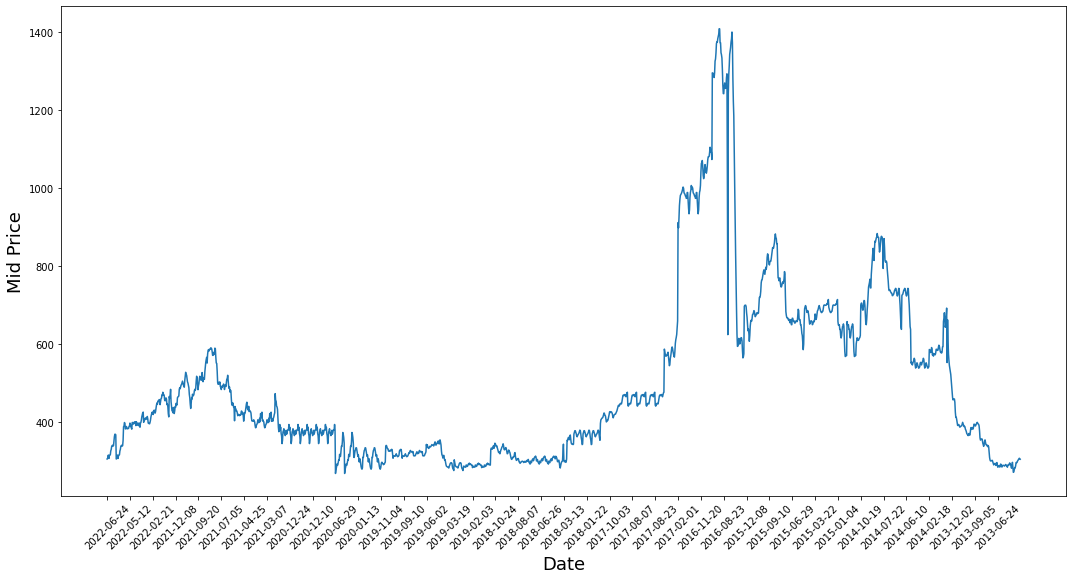

In [69]:
#Data Visualization
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(open + ltp)/2.0)
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()